# 어쩌다 데이터 분석 with 파이썬
# CHAPTER 08 데이터 분석 : EDA 실습
## 8.1 데이터 첫 탐색

## 8.1.1 라이브러리와 데이터 로드(362p) 

In [2]:
# missingno 설치
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import missingno as msno

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

# tk는 새로운 창에서 그리기, inline 기존의 쥬피터 내부에서 그리기
%matplotlib inline 

warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 140


- 캐글(https://www.kaggle.com/)에서 무료로 제공하는 데이터 셋을 사용 <br>

* ※ 참고 사항
    1. 다운로드시 계정 필요
    2. 한번 압축파일로 압축되어져 있다. 

In [254]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

# show_id(콘텐츠 아이디), type(TV쇼 또는 영화), title(제목), director(감독), cast(배우), country(국가), 
# date_added(업데이트 날짜), release_year(방영시작년도), rating(시청등급), duration(방영시간), listed_in(장르), description(설명)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 8.1.2 데이터 모양과 결측값 확인(364p)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<Axes: >

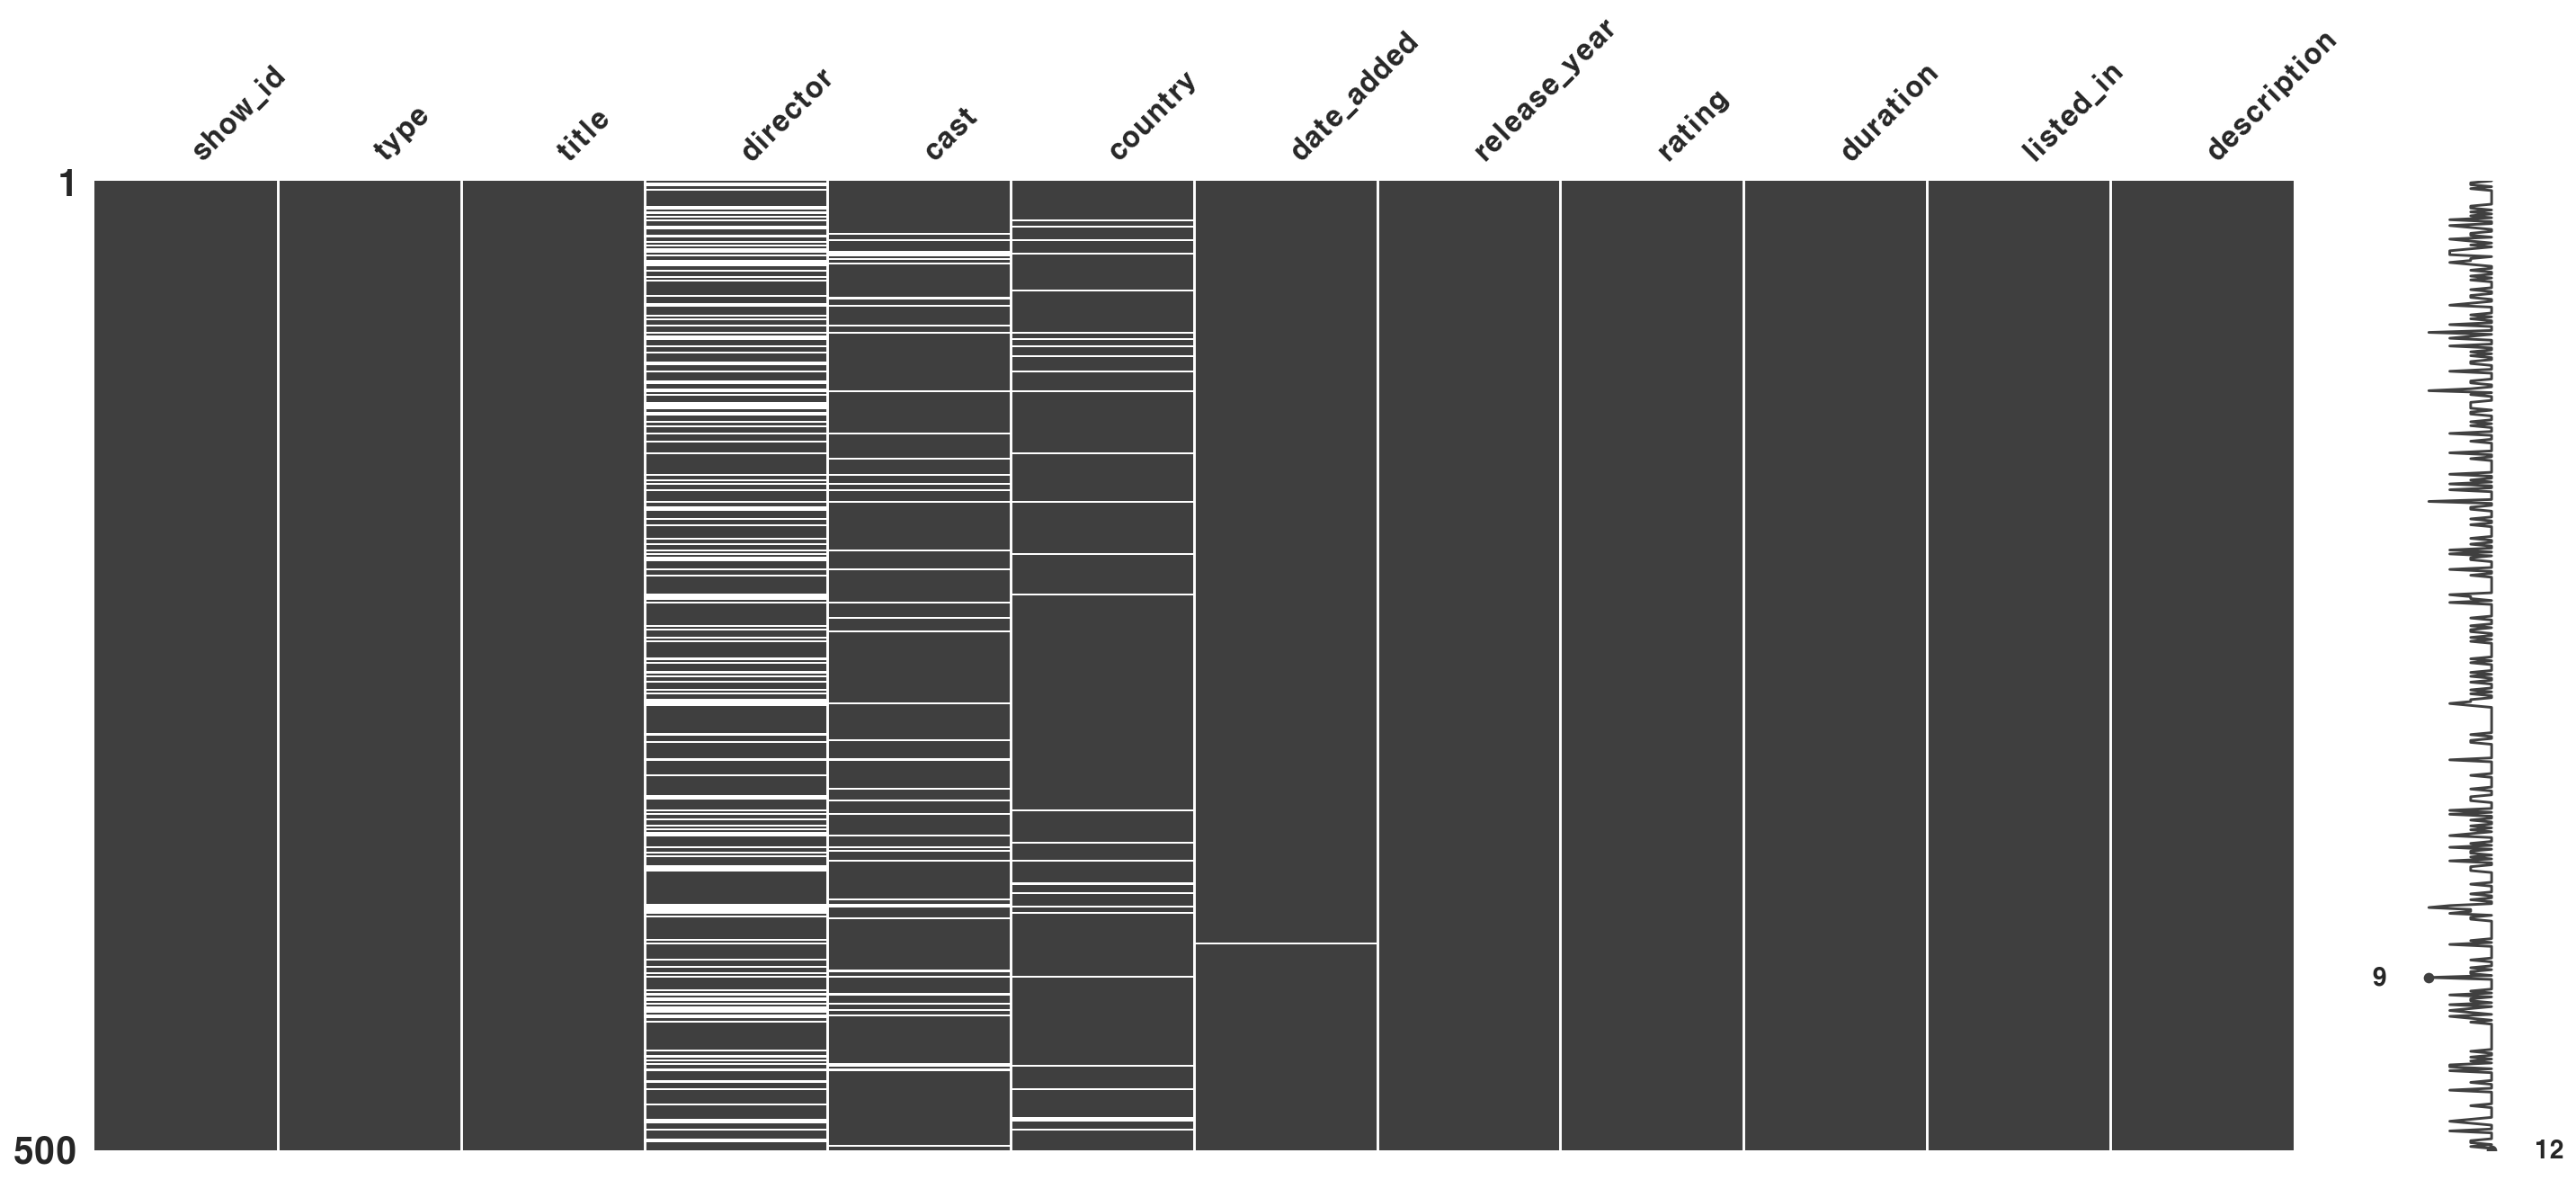

In [257]:
# 500개 기준 missingno의 matrix 그래프로 확인하기
msno.matrix(df.sample(500))
# 출력결과 director(감독), cast(배우), country(국가) 결측값이 존재

<Axes: >

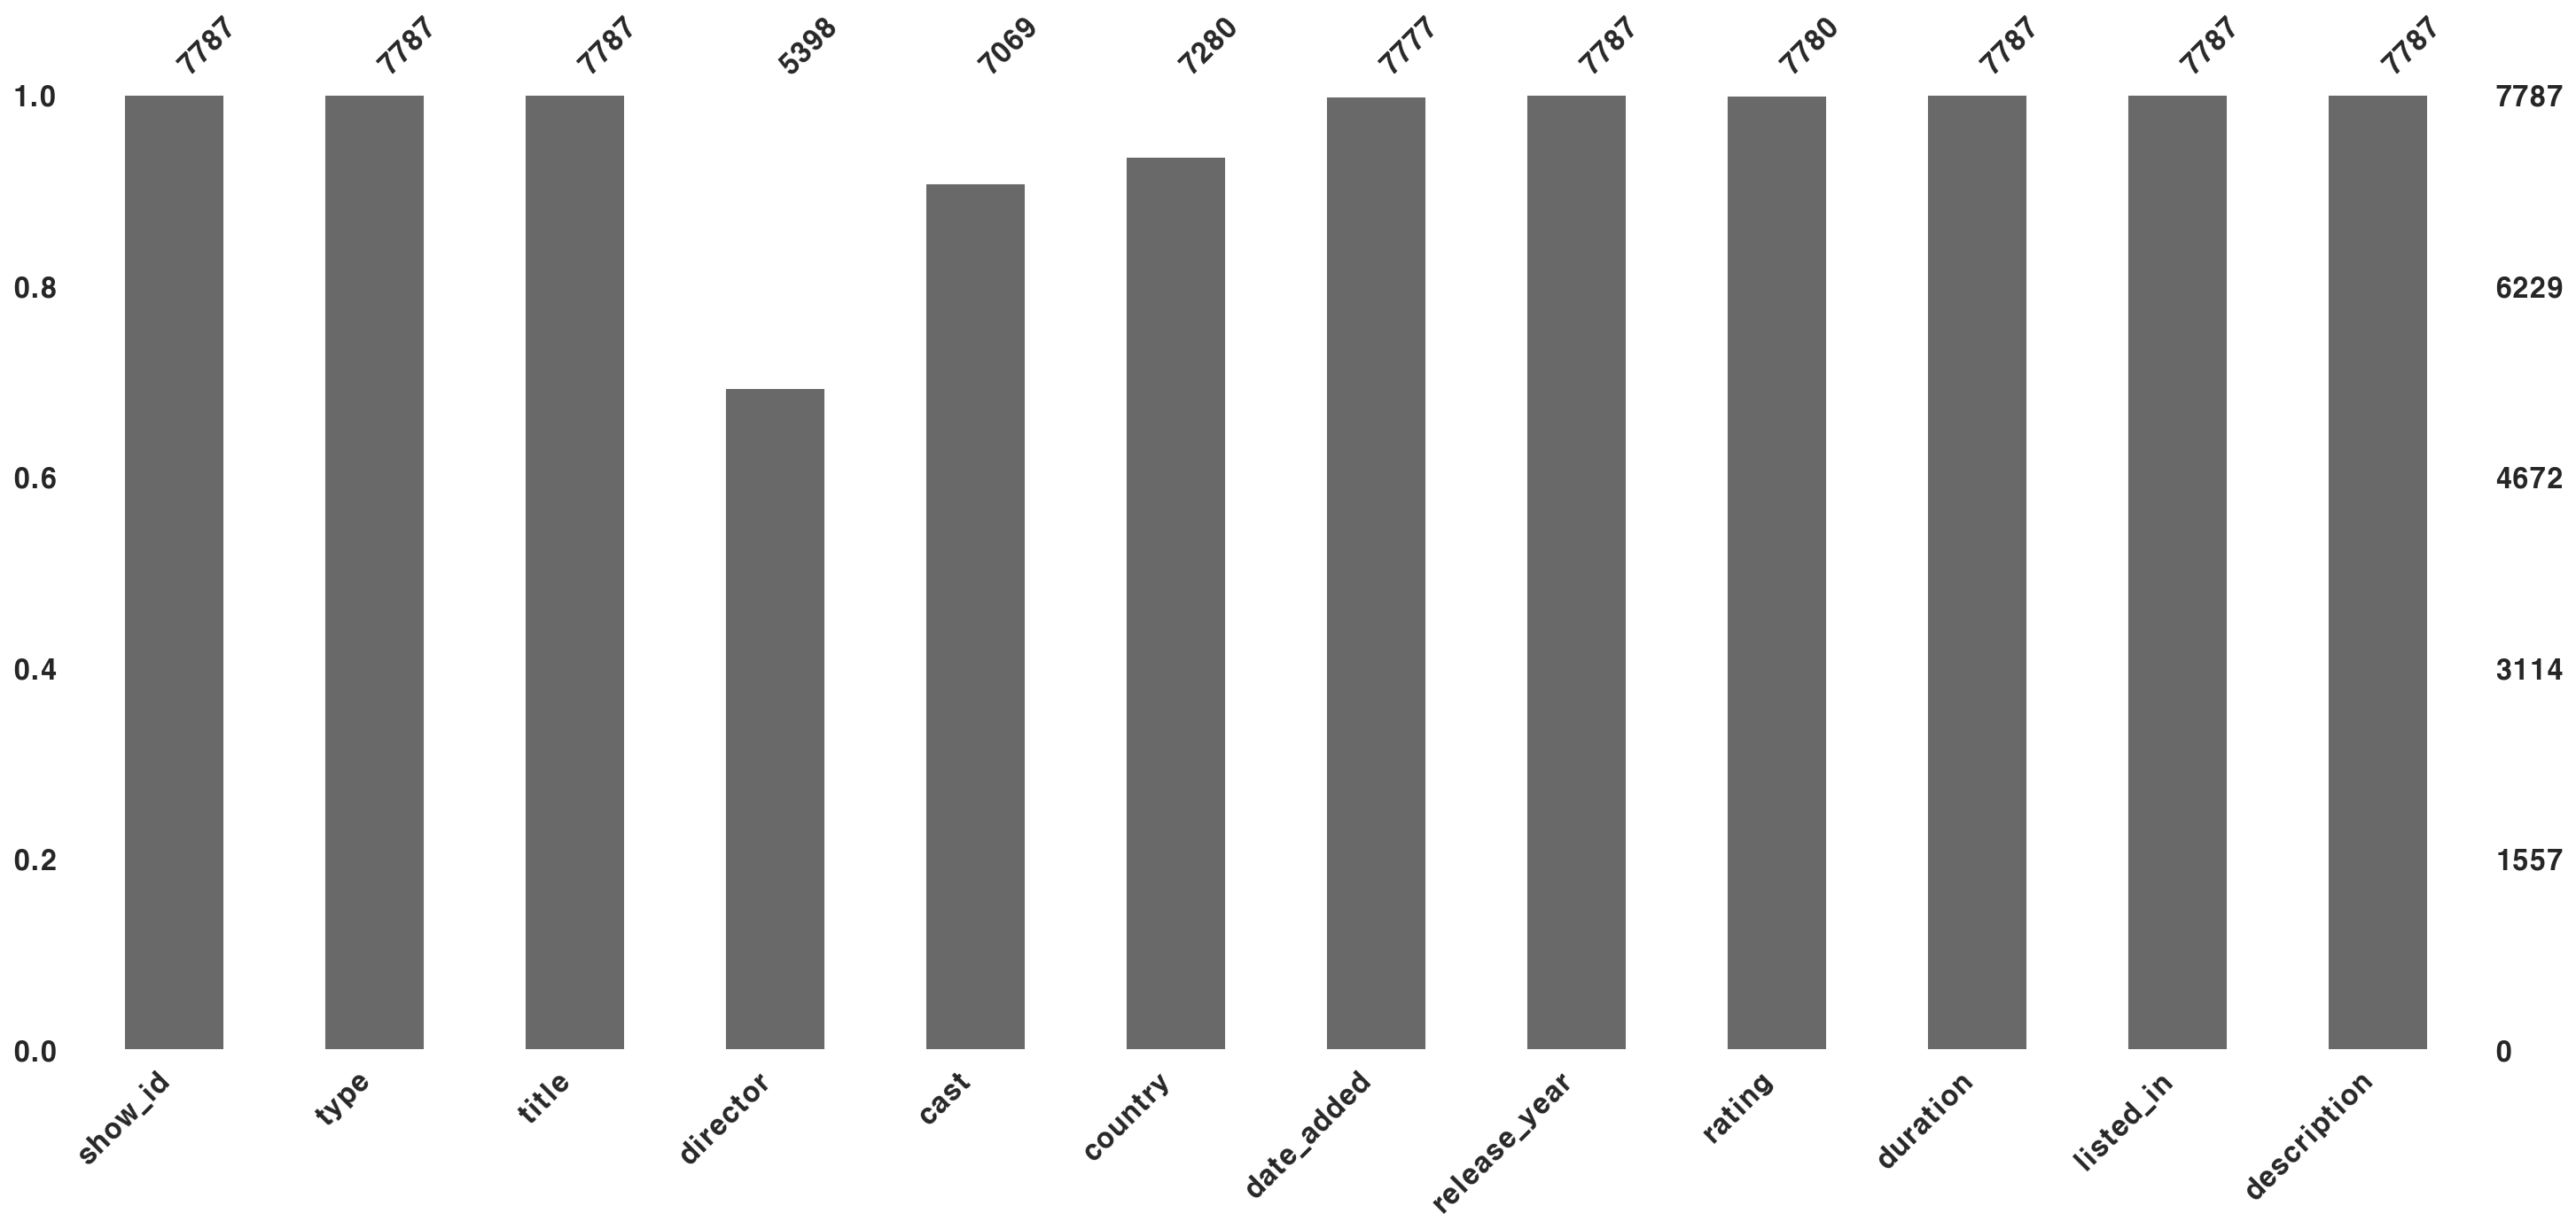

In [259]:
# director(감독), cast(배우), country(국가) 결측값수를 확인하기 위해 bar타입으로 확인하기
msno.bar(df)


In [260]:
# 결측값 수 합산해보기
df.isna().sum()
# director(감독), cast(배우), country(국가), date_added(업데이트 날짜), rating(시청등급), duration(방영시간)에 결측값이 존재

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### 8.1.3 결측값 채우기(367p)

In [261]:
# 범주형 데이터로 가장 빈도가 높은값으로 결측값 채우기
df['country'] = df['country'].fillna(df['country'].mode())

# 각각의 교유 데이터로 넘파이의 결측값으로 채운다.
df['cast'].replace(np.nan, 'Missing', inplace=True)
df['director'].replace(np.nan, 'Missing', inplace=True)

In [262]:
# 적은 결측값이 있는 컬럼은 행을 삭제
df.dropna(inplace=True)

# 중복된 행을 제거
df.drop_duplicates(inplace=True)

In [263]:
# 결측값 합산해보기
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 8.1.4 날짜시간 데이터 처리(368p)

In [264]:
# 데이터타임 타입으로 변경
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7781   2020-01-11
7782   2020-10-19
7783   2019-03-02
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7265, dtype: datetime64[ns]

In [265]:
# 연도, 월, 일 컬럼으로 분리 생성
df['month_added'] = df['date_added'].dt.month # 월
df['month_name_added'] = df['date_added'].dt.month_name() # 월 이름
df['year_added'] = df['date_added'].dt.year # 년도

# 데이터의 3개의 행만 출력
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


## 8.2 데이터 전처리
### 8.2.1 country(제작국가) 변수를 활용하여 파생변수 만들기(369p)

In [266]:
# 마지막 부분에 3개의 데이터 출력
df.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7785,s7786,TV Show,Zumbo's Just Desserts,Missing,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Missing,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,3,March,2020


- apply() 함수: DataFrame의 칼럼에 복잡한 연산을 vectorizing할 수 있게 해주는 함수로 매우 많이 활용되는 함수이다.<br> 
    간단한 경우 lambda() 함수를 적용할 수 있으며, 복잡한 경우 사용자 정의 함수를 적용할 수도 있다.

In [268]:
# 컨텍츠 제작 주요 국가 컬럼 생성
df['country_1st'] = df['country'].apply(lambda x : x.split(',')[0])
df['country_1st'].tail()

7781     United States
7782            Sweden
7783             India
7785         Australia
7786    United Kingdom
Name: country_1st, dtype: object

In [269]:
# 긴문자를 짧은문자로 변경하기
df['country_1st'].replace('United States', 'USA', inplace=True)
df['country_1st'].replace('United Kingdom', 'UK', inplace=True)
df['country_1st'].replace('South Korea', 'S. Korea', inplace=True)
df['country_1st'].tail()

7781          USA
7782       Sweden
7783        India
7785    Australia
7786           UK
Name: country_1st, dtype: object

### 8.2.2 rating(시청등급) 변수를 활용하여 파생변수 만들기(370p)

In [270]:
# 고윳값 확인해보기
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [271]:
# 시청등급 간소화 작업
# Adults(성인), Teens(청소년), Older Kids(노인), kids(어린이)
rating_ages = {
    'PG-13' : 'Teens', 
    'TV-MA' : 'Adults', 
    'TV-14' : 'Teens', 
    'TV-Y7' : 'Older Kids', 
    'PG' : 'Older Kids', 
    'R' : 'Adults', 
    'TV-PG' : 'Older Kids', 
    'TV-Y' : 'kids',
    'TV-G' : 'kids', 
    'G' : 'kids', 
    'NC-17' : 'Adults', 
    'NR' : 'Adults', 
    'TV-Y7-FV' : 'Older Kids', 
    'UR' : 'Adults'
}

In [272]:
# 간소화된 시청등급 컬럼 생성
df['target_user'] = df['rating'].replace(rating_ages)
df['target_user'].unique()

array(['Adults', 'Teens', 'Older Kids', 'kids'], dtype=object)

### 8.2.3 duration(방영시간) 변수를 활용하여 파생변수 만들기(371p)

In [273]:
df['duration'].unique()[:10]

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min'], dtype=object)

In [276]:
# Seasons이 있는 시간만 숫자값만 추출해서 컬럼 생성
df['season_count'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Season' in 
                              x['duration'] else "", axis=1)
df['season_count'].unique()

array(['4', '', '1', '2', '3', '5', '9', '8', '6', '11', '13', '12', '10',
       '7', '16', '15'], dtype=object)

In [277]:
# df['season_count']의 공백을 결측값(nan)으로 변경
df['season_count'].replace('', np.nan, inplace=True)
df['season_count']

0         4
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7781    NaN
7782    NaN
7783    NaN
7785      1
7786    NaN
Name: season_count, Length: 7265, dtype: object

In [278]:
# Seasons이 없는 값을 duration(방영시간)에 삽입 수정
df['duration'] = df.apply(lambda x : x['duration'].split(' ')[0] if 'Seasons' not in 
                              x['duration'] else "", axis=1)
df['duration']

0          
1        93
2        78
3        80
4       123
       ... 
7781     88
7782     99
7783    111
7785      1
7786     90
Name: duration, Length: 7265, dtype: object

In [279]:
# df['duration']의 공백을 결측값(nan)으로 변경
df['duration'].replace('', np.nan, inplace=True)
df['duration']

0       NaN
1        93
2        78
3        80
4       123
       ... 
7781     88
7782     99
7783    111
7785      1
7786     90
Name: duration, Length: 7265, dtype: object

In [280]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'month_name_added', 'year_added', 'country_1st',
       'target_user', 'season_count'],
      dtype='object')

### 8.2.4 listed_in(장르) 변숫값 분리하기(373p)

In [281]:
# genre(종류)컬럼 생성(,의 앞뒤 공백제거)
df['genre'] = df['listed_in'].apply(lambda x : x.replace(' ,', ',').replace(', ', ',').split(','))
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020,Brazil,Adults,4,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017,USA,Teens,NaN,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,January,2020,USA,Teens,NaN,[Dramas]


### 8.2.5 불필요한 변수 삭제하기(374p)

In [282]:
# show_id(콘텐츠 아이디), description(설명) 삭제
df = df.drop(columns=['show_id', 'description'])
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'month_added',
       'month_name_added', 'year_added', 'country_1st', 'target_user',
       'season_count', 'genre'],
      dtype='object')

### 8.2.6 데이터 타입 변경하기(374p)

In [283]:
df.dtypes

type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
month_added                  int64
month_name_added            object
year_added                   int64
country_1st                 object
target_user                 object
season_count                object
genre                       object
dtype: object

In [284]:
# 카테고리 타입으로 변경
df['type'] = pd.Categorical(df['type']) 
df['target_user'] = pd.Categorical(df['target_user'], categories=['kids', 'Older Kids', 'Teens', 'Adults'])

# 수치형 타입으로 변경
df['year_added'] = pd.to_numeric(df['year_added'])
df['duration'] = pd.to_numeric(df['duration'])
df['season_count'] = pd.to_numeric(df['season_count'])

In [285]:
df.dtypes

type                      category
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                   float64
listed_in                   object
month_added                  int64
month_name_added            object
year_added                   int64
country_1st                 object
target_user               category
season_count               float64
genre                       object
dtype: object

### 8.2.7 콘텐츠 타입별로 데이터 저장하기(376p)

In [286]:
df_tv = df[df['type'] == 'TV Show']
df_tv

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,NaN,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,August,2020,Brazil,Adults,4.0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1.0,"International TV Shows, TV Dramas, TV Mysteries",7,July,2017,Turkey,Adults,1.0,"[International TV Shows, TV Dramas, TV Mysteries]"
11,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Dramas",11,November,2018,Poland,Adults,1.0,"[Crime TV Shows, International TV Shows, TV Dr..."
12,TV Show,1994,Diego Enrique Osorno,Missing,Mexico,2019-05-17,2019,TV-MA,1.0,"Crime TV Shows, Docuseries, International TV S...",5,May,2019,Mexico,Adults,1.0,"[Crime TV Shows, Docuseries, International TV ..."
24,TV Show,​SAINT SEIYA: Knights of the Zodiac,Missing,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,2020,TV-14,NaN,"Anime Series, International TV Shows",1,January,2020,Japan,Teens,2.0,"[Anime Series, International TV Shows]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766,TV Show,Zig & Sharko,Missing,Missing,France,2017-12-01,2016,TV-Y7,1.0,"Kids' TV, TV Comedies",12,December,2017,France,Older Kids,1.0,"[Kids' TV, TV Comedies]"
7767,TV Show,Zindagi Gulzar Hai,Missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1.0,"International TV Shows, Romantic TV Shows, TV ...",12,December,2016,Pakistan,Older Kids,1.0,"[International TV Shows, Romantic TV Shows, TV..."
7775,TV Show,Zoids Wild,Missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1.0,"Anime Series, Kids' TV",8,August,2020,Japan,Older Kids,1.0,"[Anime Series, Kids' TV]"
7779,TV Show,Zona Rosa,Missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1.0,"International TV Shows, Spanish-Language TV Sh...",11,November,2019,Mexico,Adults,1.0,"[International TV Shows, Spanish-Language TV S..."


In [287]:
df_movie = df[df['type'] == 'Movie']
df_movie

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...",11,November,2017,USA,Teens,NaN,"[Action & Adventure, Independent Movies, Sci-F..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123.0,Dramas,1,January,2020,USA,Teens,NaN,[Dramas]
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95.0,"Horror Movies, International Movies",6,June,2020,Egypt,Adults,NaN,"[Horror Movies, International Movies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94.0,"Dramas, Independent Movies, International Movies",7,July,2018,India,Adults,NaN,"[Dramas, Independent Movies, International Mov..."
7781,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies",1,January,2020,USA,Older Kids,NaN,"[Children & Family Movies, Comedies]"
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99.0,"Dramas, International Movies",10,October,2020,Sweden,Adults,NaN,"[Dramas, International Movies]"
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",3,March,2019,India,Teens,NaN,"[Dramas, International Movies, Music & Musicals]"


## 8.3 데이터 시각화 기초
### 8.3.1 콘텐츠 타입별 개수 시각화하기(378p)

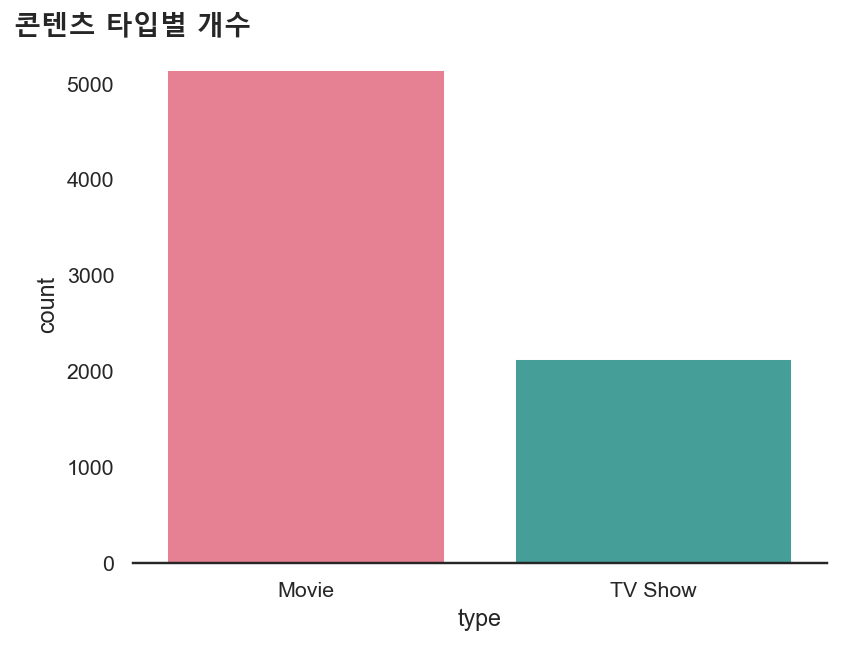

In [288]:
# 시본 그래프 스타일 지정: 한번만 실행
sns.set(style='white')

# palette='색깔'
sns.countplot(x='type', data=df, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('콘텐츠 타입별 개수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

### 8.3.2 콘텐츠 타입 비중 시각화 하기(379p)

In [289]:
type_count = df.groupby(['type'])['type'].count() # type(영화, TV)의 전체 갯수
length = len(df) # df의 전체 갯수
result = (type_count/length).round(2)

# 한줄로 표현
# (df.groupby(['type'])['type'].count()/length).round(2)

result

type
Movie      0.71
TV Show    0.29
Name: type, dtype: float64

In [290]:
# 행과 열 교체후 데이터 프레임으로 저장
type_ratio = pd.DataFrame(result).T
type_ratio

type,Movie,TV Show
type,0.71,0.29


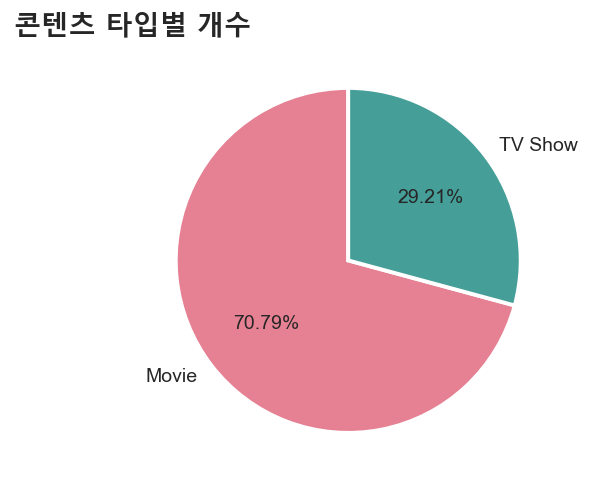

In [291]:
# 파이 그래프로 그려보기
labels = ['Movie', 'TV Show']
wedgeprops = {'linewidth' : 2, 'width' : 1, 'edgecolor' : 'w'}

plt.figure(figsize=(6, 4))
plt.pie(type_count/length, labels=labels, autopct='%1.2f%%', startangle=90, 
        colors=['#E68193', '#459E97'],
        textprops={'fontsize' : 10}, wedgeprops=wedgeprops)
plt.title('콘텐츠 타입별 개수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


### 8.3.3 월별 콘텐츠 업로드 수 시각화하기(381p)

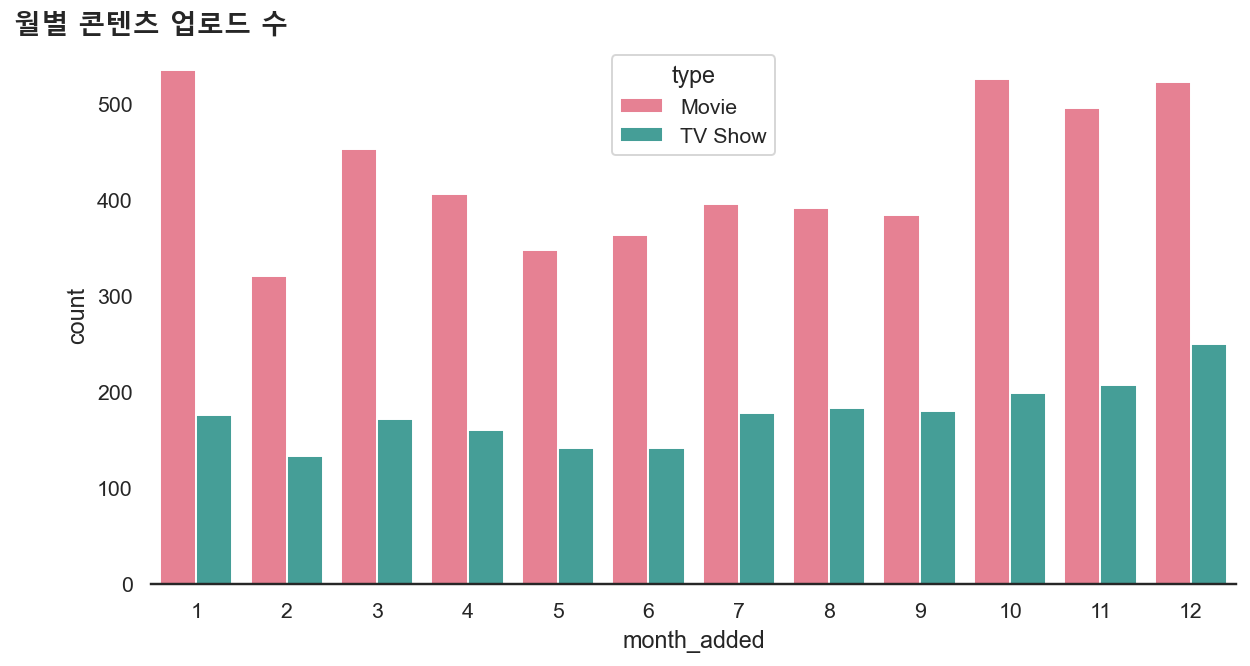

In [292]:
# countplot()로 개수 표현

plt.figure(figsize=(10, 5))
sns.countplot(x='month_added', hue='type', data=df, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('월별 콘텐츠 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


### 8.3.4 연도순으로 콘텐츠 개봉 또는 방영 수 시각화하기(382p)

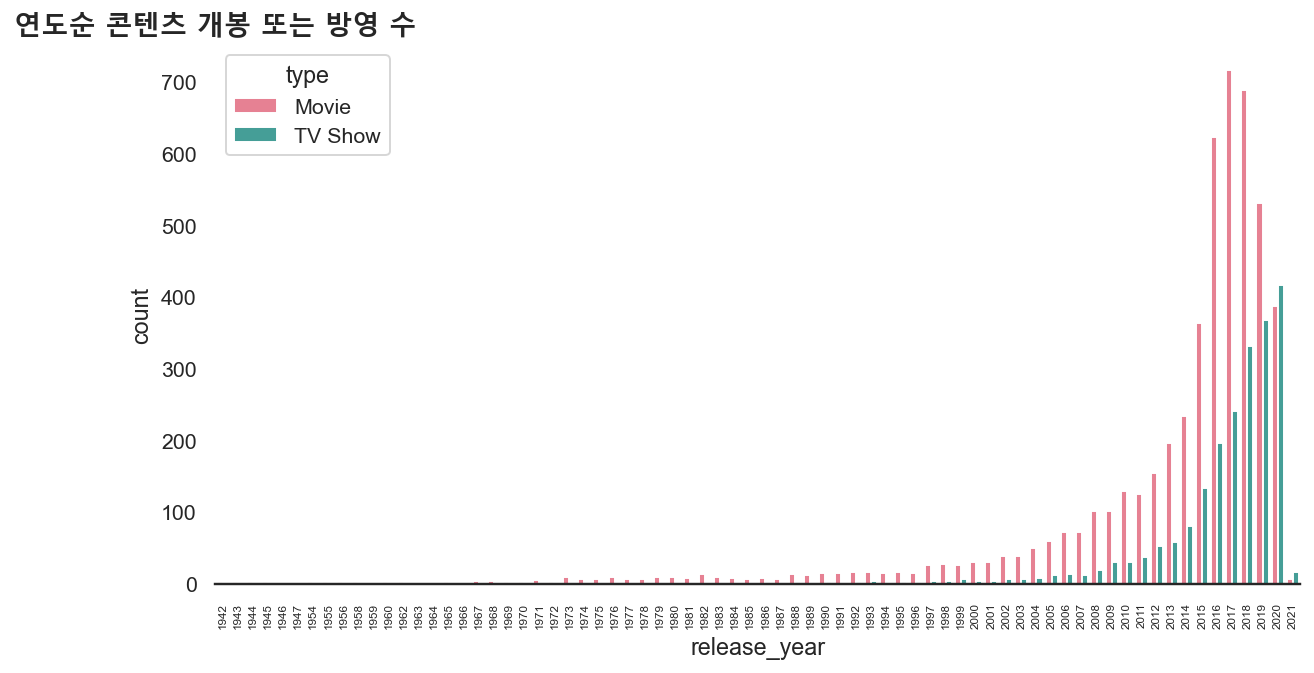

In [293]:
# countplot() 함수 활용

plt.figure(figsize=(10, 5))
sns.countplot(x='release_year', hue='type', data=df, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연도순 콘텐츠 개봉 또는 방영 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()


### 8.3.5 콘텐츠 타입별 타깃 유저 수 시각화하기(383p)

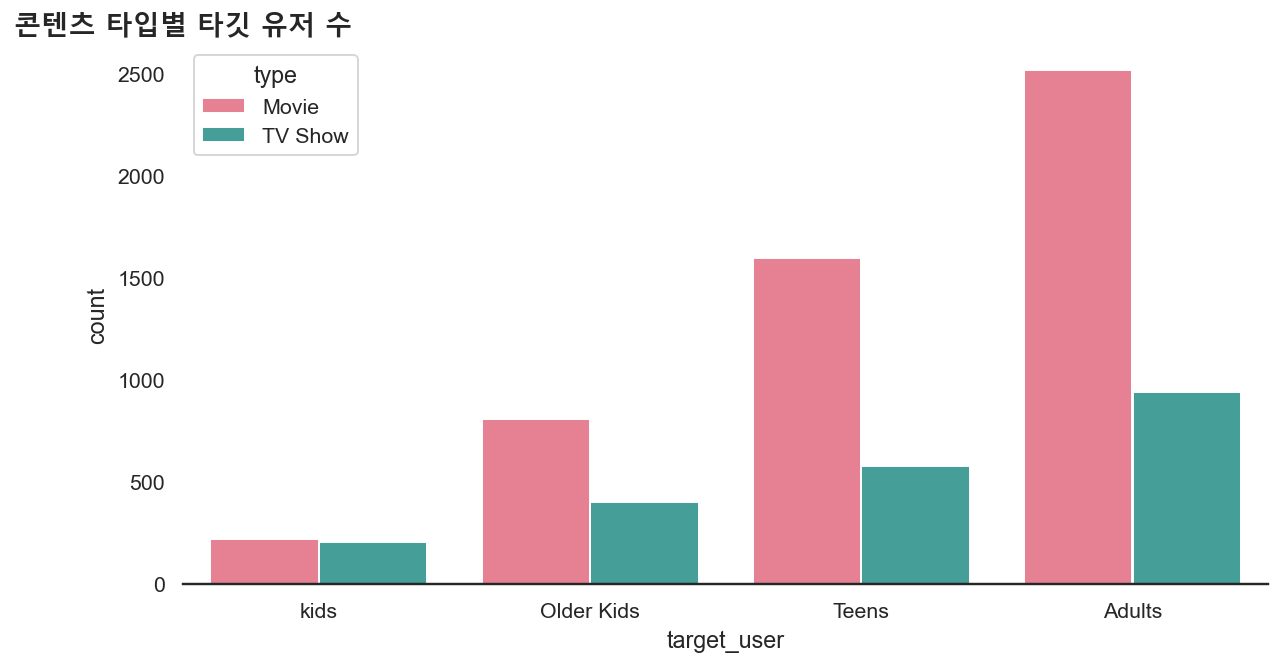

In [294]:
# countplot() 함수 활용

plt.figure(figsize=(10, 5))
sns.countplot(x='target_user', hue='type', data=df, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('콘텐츠 타입별 타깃 유저 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()


### 8.3.6 연도순 콘텐츠 타입별 업로드 수 시각화하기(384p)

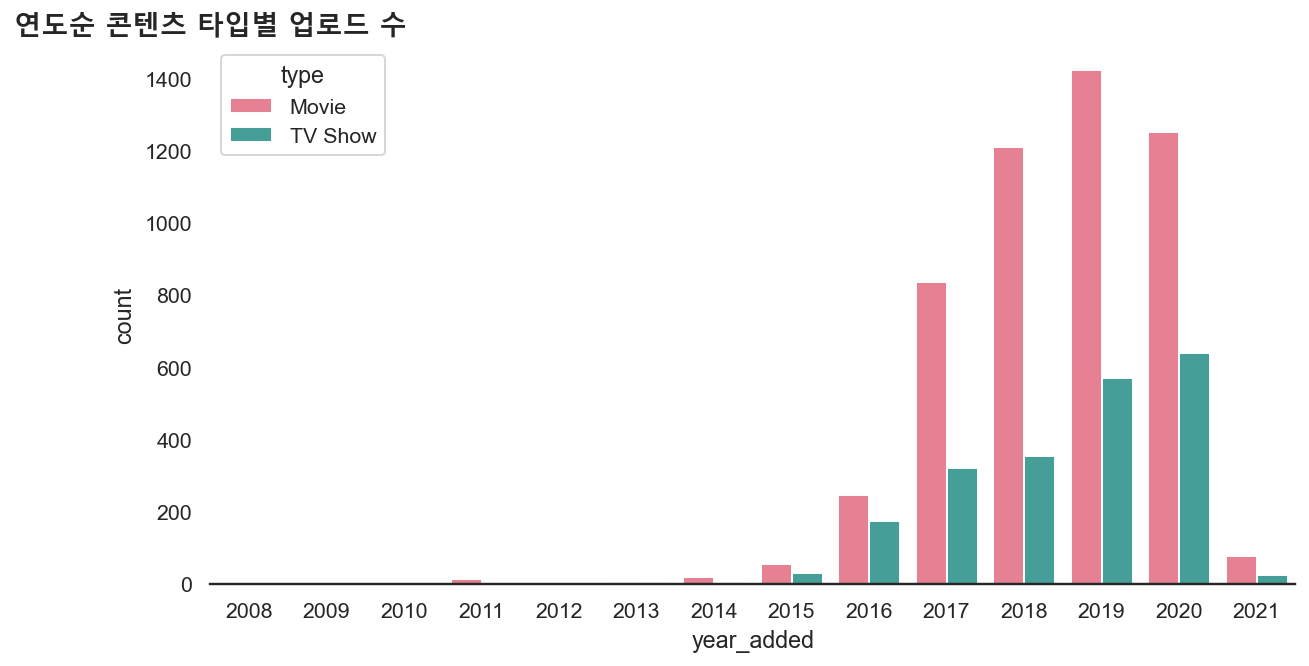

In [295]:
# countplot() 함수 활용
# hue='type': 타입에 따라 다르게 설정

plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', hue='type', data=df, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연도순 콘텐츠 타입별 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()


### 8.3.7 연도순 콘텐츠 타입과 타깃 유저 비중 시각화하기(385p)

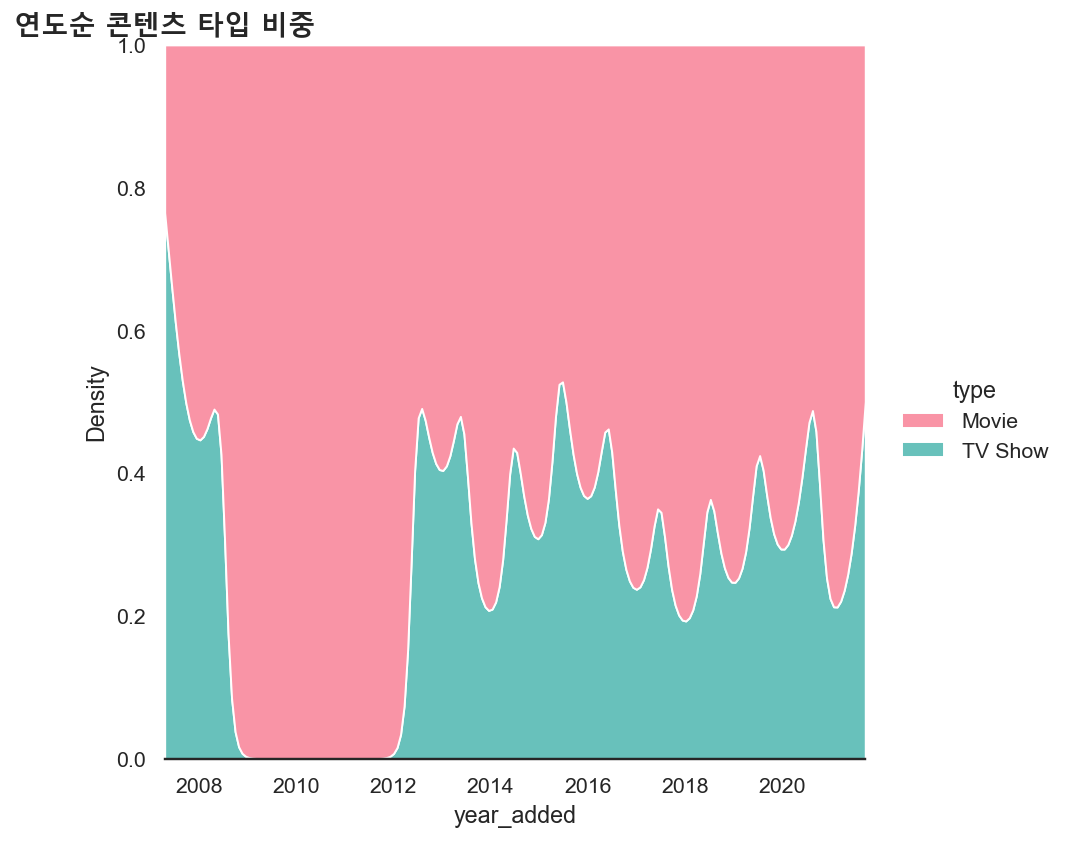

In [296]:
# 시본의 displot() 함수을 이용하여 비중 표현
# displot()의 kind='kde' 방식으로 출력

sns.displot(x='year_added', hue='type', data=df, kind='kde', height=6, 
            multiple='fill', clip=(0, None), palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연도순 콘텐츠 타입 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()


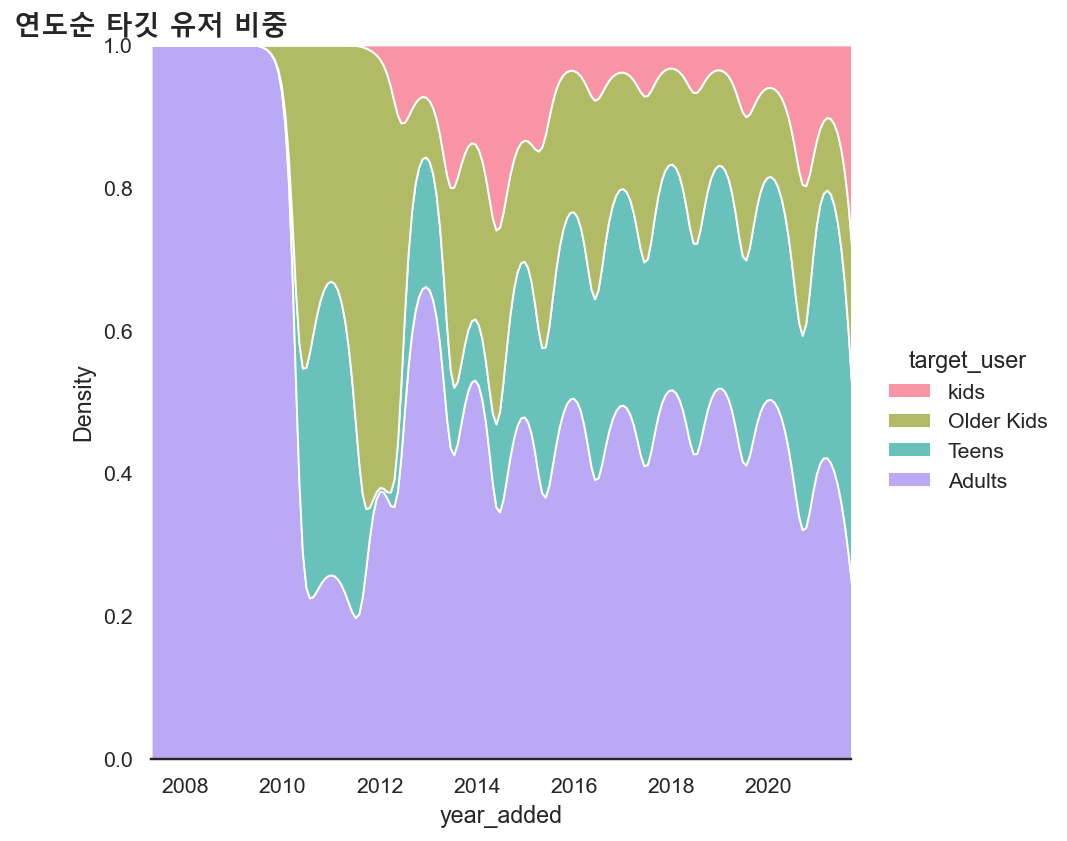

In [297]:
# 시본의 displot() 함수을 이용하여 비중 표현
# displot()의 kind='kde' 방식으로 출력

sns.displot(x='year_added', hue='target_user', data=df, kind='kde', height=6, 
            multiple='fill', clip=(0, None), palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연도순 타깃 유저 비중', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()



## 8.4 데이터 시각화 고급
### 8.4.1 영화와 TV쇼 장르 Top 10 시각화하기(388p)

In [298]:
movie_top10 = df_movie['listed_in'].value_counts().head(10)
movie_top10

Documentaries                                       322
Dramas, International Movies                        307
Stand-Up Comedy                                     293
Comedies, Dramas, International Movies              240
Dramas, Independent Movies, International Movies    213
Children & Family Movies, Comedies                  160
Documentaries, International Movies                 159
Comedies, International Movies                      149
Dramas, International Movies, Romantic Movies       147
Children & Family Movies                            138
Name: listed_in, dtype: int64

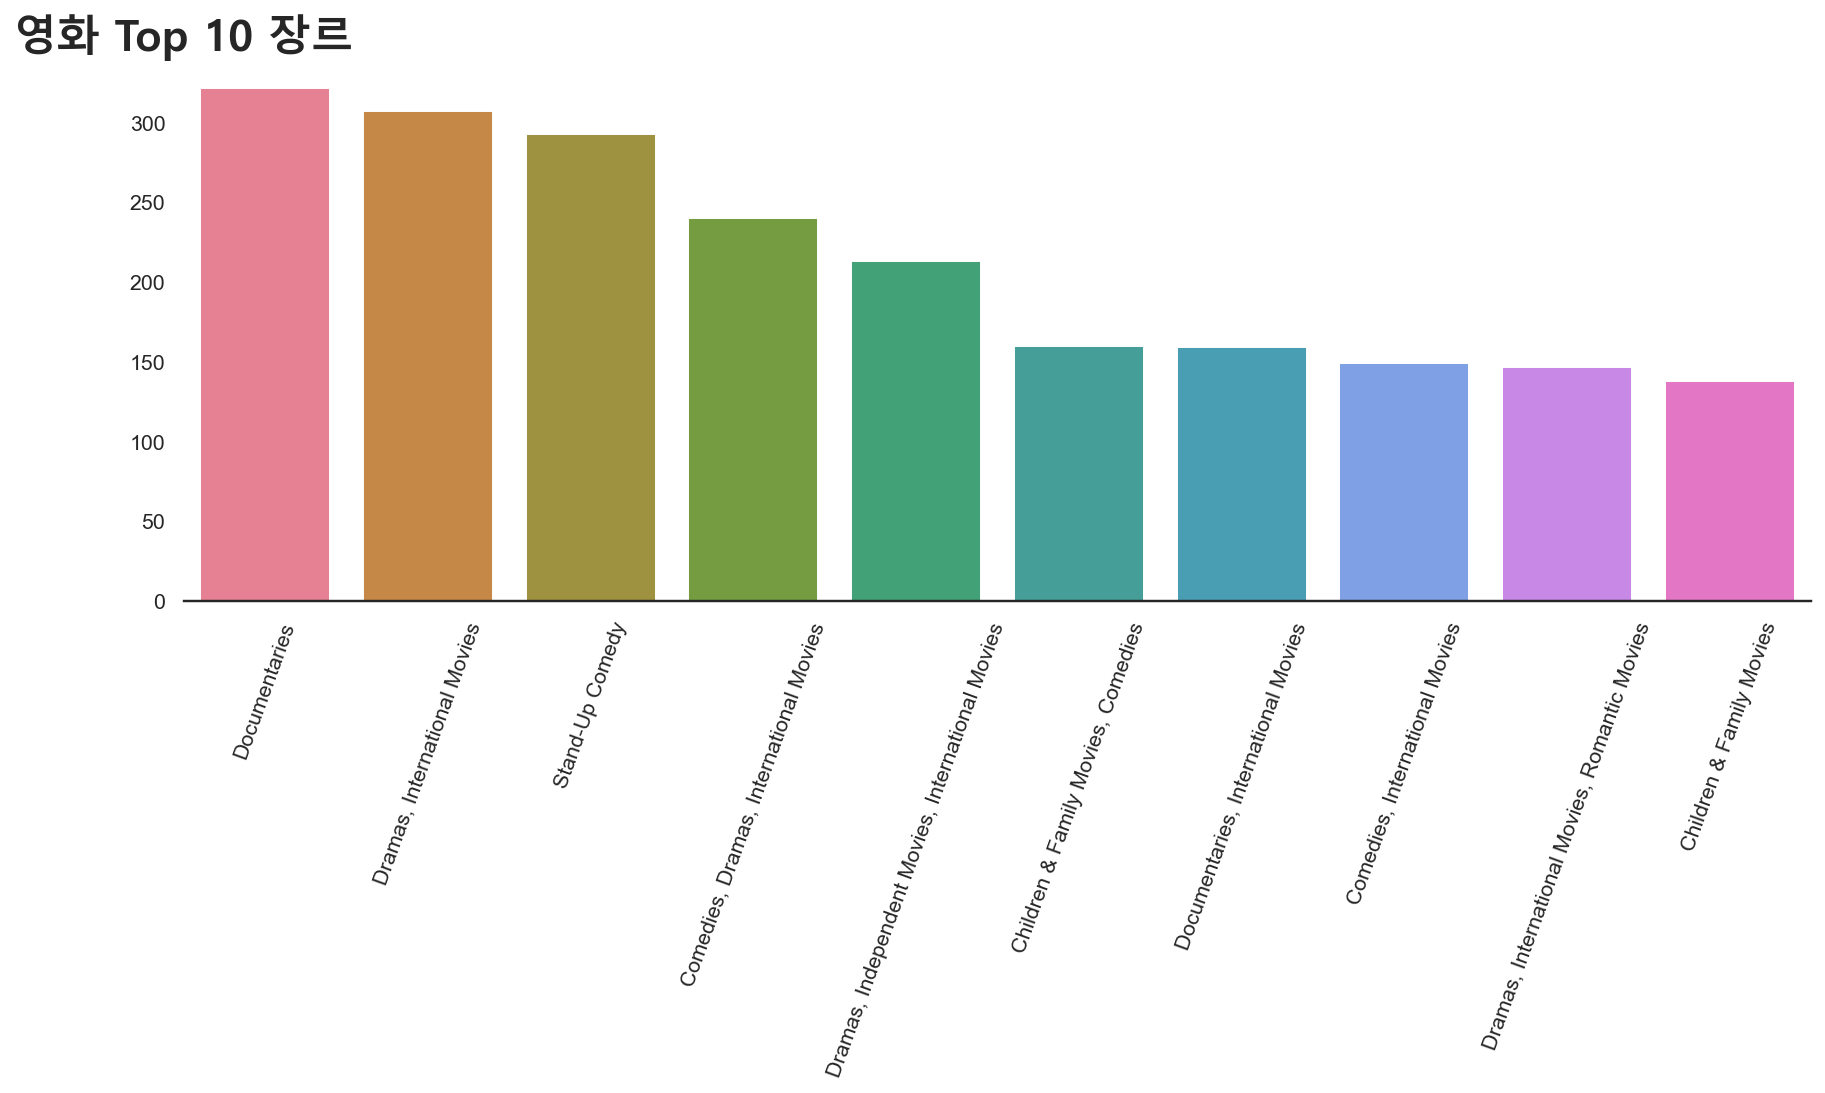

In [299]:
# barplot() 함수을 이용하여 시각화

plt.figure(figsize=(15, 5))
sns.barplot(x=movie_top10.index, 
            y=movie_top10.values, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.xticks(rotation=70)
plt.title('영화 Top 10 장르', fontsize=22, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


In [300]:
tv_top10 = df_tv['listed_in'].value_counts().head(10)
tv_top10

Kids' TV                                                      166
Crime TV Shows, International TV Shows, TV Dramas              96
International TV Shows, TV Dramas                              77
Kids' TV, TV Comedies                                          77
Reality TV                                                     73
Anime Series, International TV Shows                           72
Docuseries                                                     65
International TV Shows, Korean TV Shows, Romantic TV Shows     64
International TV Shows, Romantic TV Shows, TV Dramas           61
TV Comedies                                                    61
Name: listed_in, dtype: int64

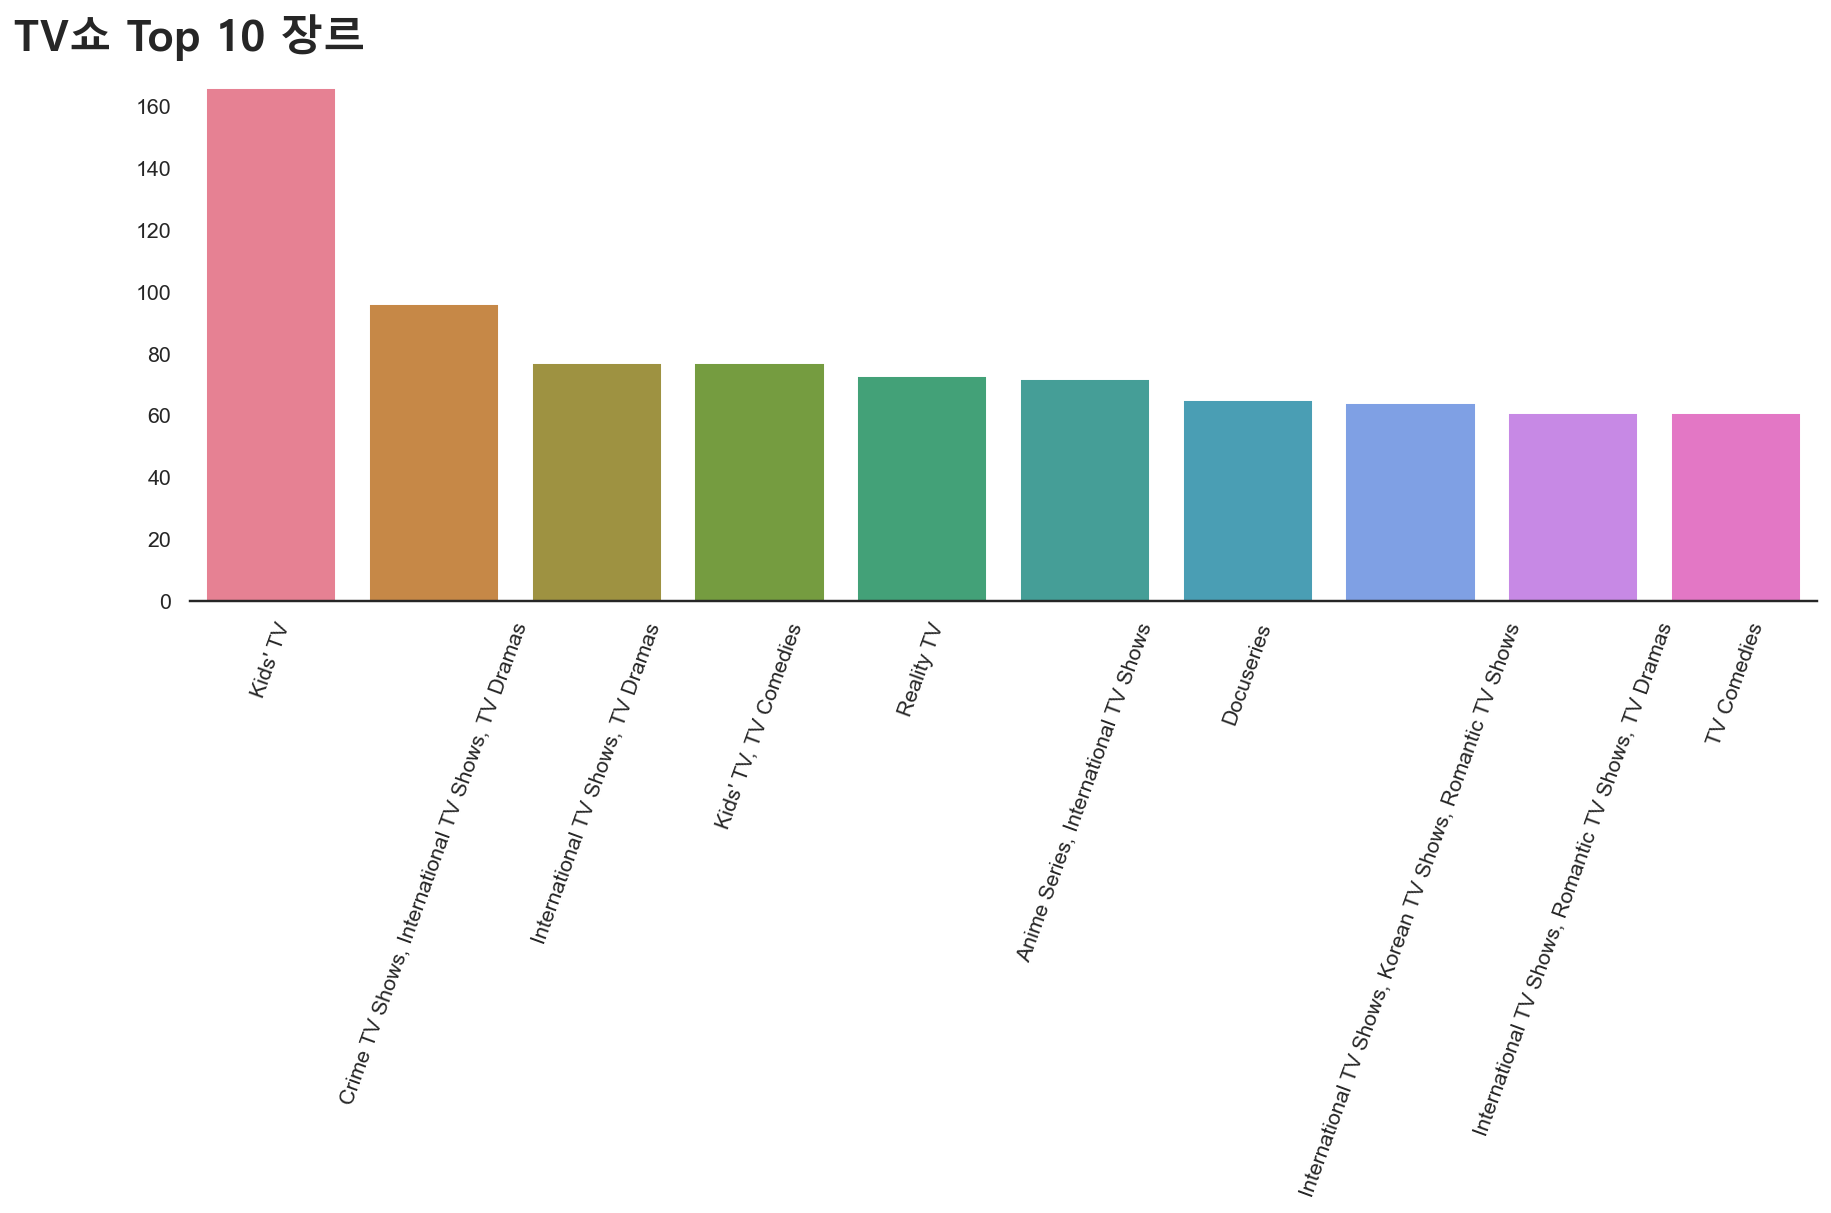

In [301]:
# barplot() 함수을 이용하여 시각화

plt.figure(figsize=(15, 5))
sns.barplot(x=tv_top10.index, 
            y=tv_top10.values, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.xticks(rotation=70)
plt.title('TV쇼 Top 10 장르', fontsize=22, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


### 8.4.2 영화 재생 시간 분포와 TV쇼 시즌 수 시각화하기(391p)

In [304]:
# duration(방영시간)이 0이상인 데이터(음수데이터 제거하기)
# 추가사항 1이상으로 삽입하니 교재에 나온대로 출력됨
df_duration_over0 = df[df['duration'] > 1]
# df_duration_over0 = df[df['duration'] > 0]

df_duration_over0

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,"Dramas, International Movies",12,December,2016,Mexico,Adults,NaN,"[Dramas, International Movies]"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,"Horror Movies, International Movies",12,December,2018,Singapore,Adults,NaN,"[Horror Movies, International Movies]"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,"Action & Adventure, Independent Movies, Sci-Fi...",11,November,2017,USA,Teens,NaN,"[Action & Adventure, Independent Movies, Sci-F..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123.0,Dramas,1,January,2020,USA,Teens,NaN,[Dramas]
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95.0,"Horror Movies, International Movies",6,June,2020,Egypt,Adults,NaN,"[Horror Movies, International Movies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94.0,"Dramas, Independent Movies, International Movies",7,July,2018,India,Adults,NaN,"[Dramas, Independent Movies, International Mov..."
7781,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,"Children & Family Movies, Comedies",1,January,2020,USA,Older Kids,NaN,"[Children & Family Movies, Comedies]"
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99.0,"Dramas, International Movies",10,October,2020,Sweden,Adults,NaN,"[Dramas, International Movies]"
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,"Dramas, International Movies, Music & Musicals",3,March,2019,India,Teens,NaN,"[Dramas, International Movies, Music & Musicals]"


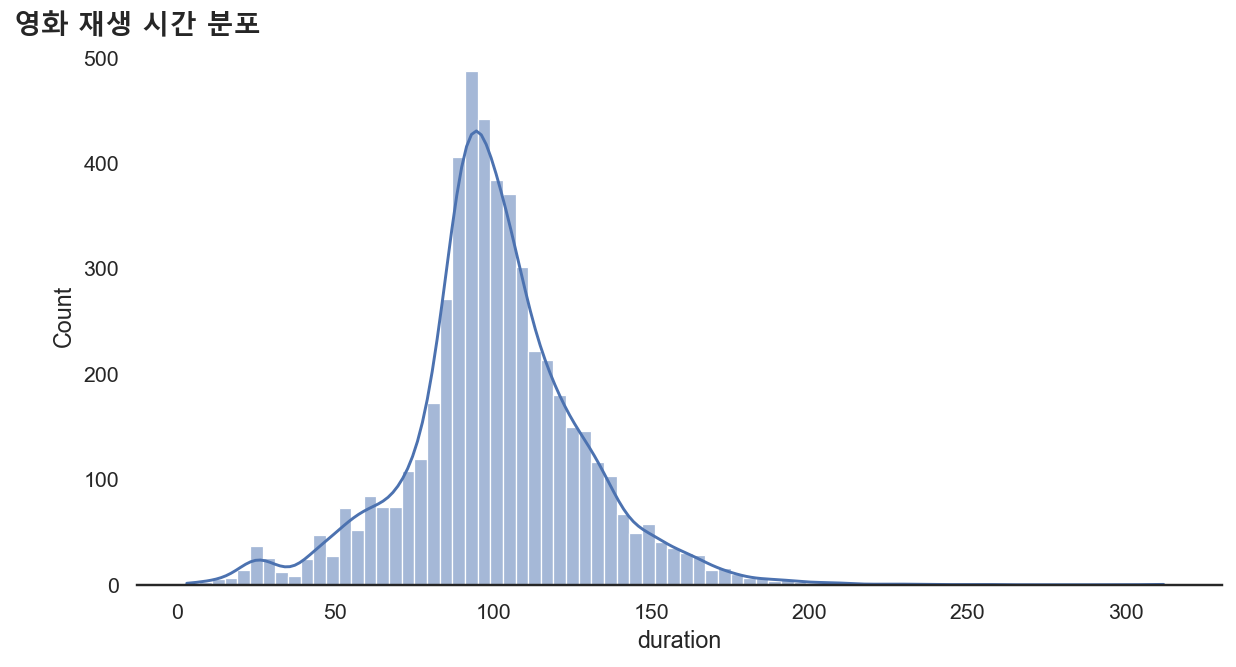

In [305]:
# histplot() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
sns.histplot(x='duration', bins=30, binwidth=4, kde=True, discrete=False, 
             data=df_duration_over0)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('영화 재생 시간 분포', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


In [306]:
# TV쇼 컨텐츠 해당 시즌 값
df_season_count = df['season_count'].value_counts().reset_index().sort_values('season_count', ascending=False)
df_season_count

,index,season_count
0,1.0,1371
1,2.0,350
2,3.0,173
3,4.0,86
4,5.0,57
5,6.0,30
6,7.0,18
7,8.0,17
8,9.0,7
9,10.0,5


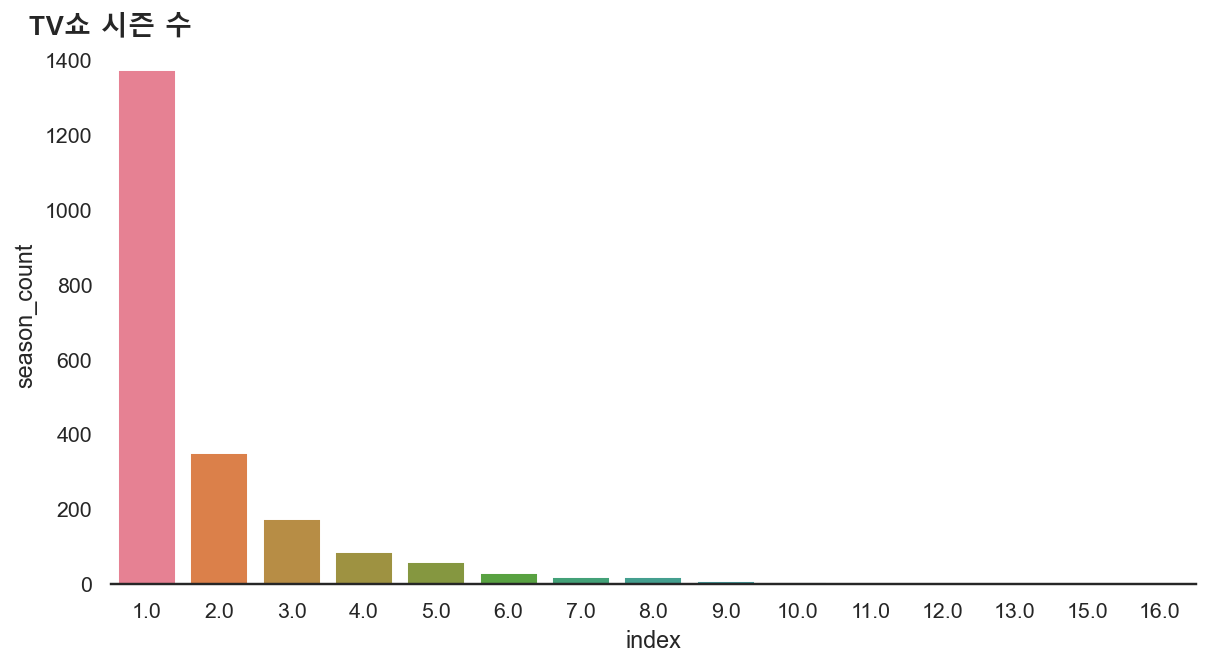

In [309]:
# barplot() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
sns.barplot(x='index', y='season_count', data=df_season_count, palette='husl')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('TV쇼 시즌 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()


### 8.4.3 연도순 콘텐츠 업로드 수 시각화하기(393p)

In [310]:
contents_added_movie = df_movie['year_added'].value_counts().reset_index()
contents_added_movie = contents_added_movie.rename(columns= {'index' : 'year_added', 'year_added' : 'count'})
contents_added_movie = contents_added_movie.sort_values('year_added')
contents_added_movie['type'] = 'Movie'

In [311]:
contents_added_movie

,year_added,count,type
13,2008,1,Movie
11,2009,2,Movie
12,2010,1,Movie
8,2011,13,Movie
10,2012,3,Movie
9,2013,6,Movie
7,2014,19,Movie
6,2015,54,Movie
4,2016,247,Movie
3,2017,837,Movie


In [312]:
contents_added_tv = df_tv['year_added'].value_counts().reset_index()
contents_added_tv = contents_added_tv.rename(columns= {'index' : 'year_added', 'year_added' : 'count'})
contents_added_tv = contents_added_tv.sort_values('year_added')
contents_added_tv['type'] = 'TV show'

In [313]:
contents_added_tv

,year_added,count,type
9,2008,1,TV show
8,2013,5,TV show
7,2014,6,TV show
5,2015,29,TV show
4,2016,174,TV show
3,2017,320,TV show
2,2018,353,TV show
1,2019,571,TV show
0,2020,639,TV show
6,2021,24,TV show


In [314]:
df_contents_added = pd.concat([contents_added_tv, contents_added_movie])
df_contents_added = df_contents_added.reset_index()
df_contents_added

,index,year_added,count,type
0,9,2008,1,TV show
1,8,2013,5,TV show
2,7,2014,6,TV show
3,5,2015,29,TV show
4,4,2016,174,TV show
5,3,2017,320,TV show
6,2,2018,353,TV show
7,1,2019,571,TV show
8,0,2020,639,TV show
9,6,2021,24,TV show


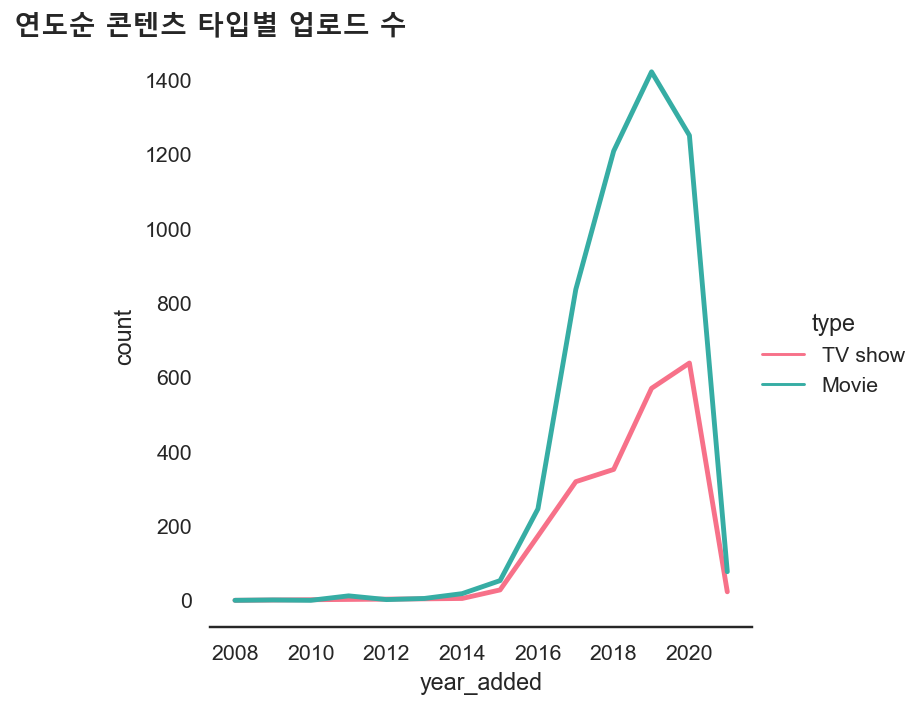

In [315]:
# relplot() 함수을 이용하여 시각화

sns.relplot(x='year_added', y='count', hue='type', linewidth=2.5, palette='husl',
            kind='line', data=df_contents_added)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연도순 콘텐츠 타입별 업로드 수', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks()
plt.show()


### 8.4.4 상관관계: 연도와 월 콘텐츠 업로드 수를 히트맵으로 시각화하기(397p)

In [318]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December'][::-1]
df_bymonth = df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T
df_bymonth

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month_name_added,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,93.0,110.0,173.0,206.0,161.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,45.0,79.0,151.0,262.0,152.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,14.0,50.0,123.0,171.0,185.0,164.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,40.0,104.0,113.0,130.0,166.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,40.0,102.0,161.0,136.0,132.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,77.0,152.0,157.0,150.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,17.0,90.0,67.0,164.0,159.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,12.0,86.0,91.0,133.0,159.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,93.0,106.0,157.0,181.0,0.0


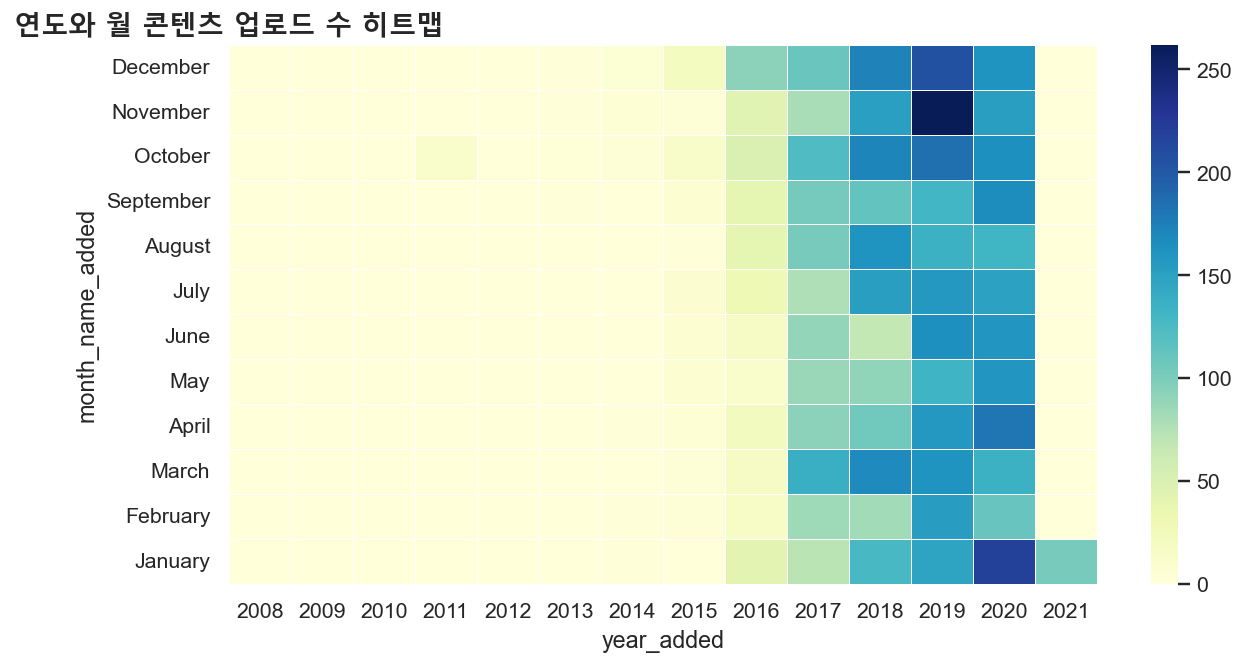

In [319]:
# heatmap() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
sns.heatmap(df_bymonth, linewidths=.5, cmap='YlGnBu')
plt.title('연도와 월 콘텐츠 업로드 수 히트맵', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


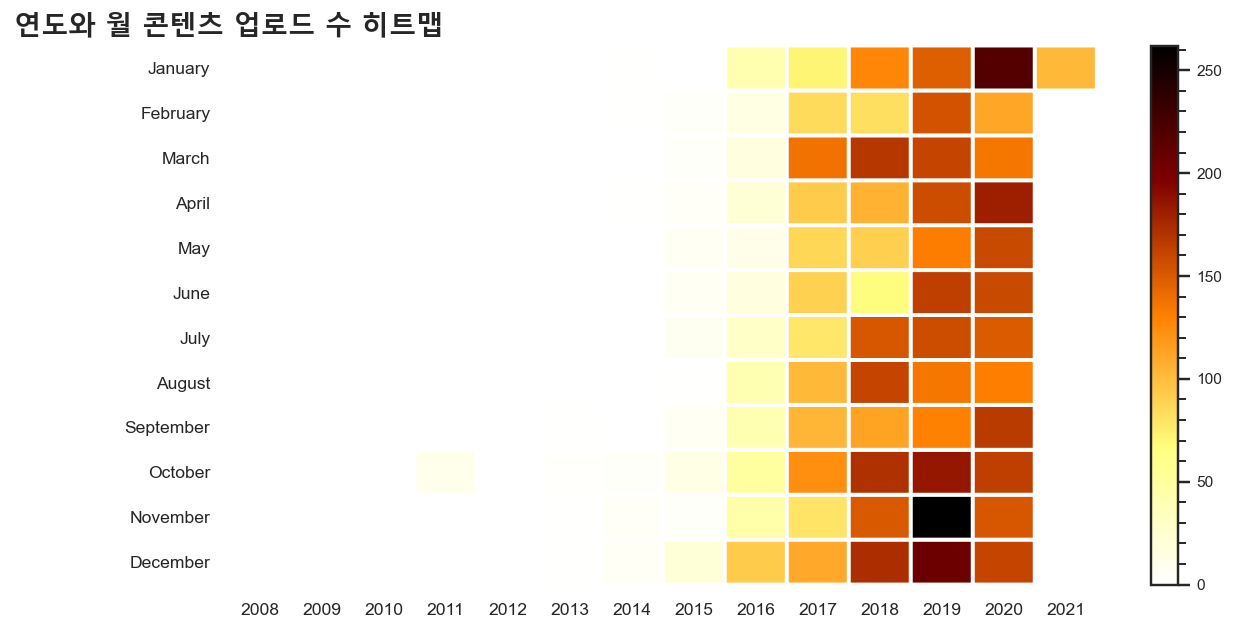

In [321]:
# pcolor() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
plt.pcolor(df_bymonth, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.title('연도와 월 콘텐츠 업로드 수 히트맵', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.xticks(np.arange(0.5, len(df_bymonth.columns), 1), df_bymonth.columns, 
           fontsize=9, fontfamily='arial')
plt.yticks(np.arange(0.5, len(df_bymonth.index), 1), df_bymonth.index, 
           fontsize=9, fontfamily='arial')
plt.box(False)
plt.show()


### 8.4.5 랭킹: 콘텐츠 제작 국가 Top10 시각화하기(400p)

In [322]:
top10_country = df.groupby('country_1st')['country'].agg('count').sort_values(ascending=False)[:10]
top10_country.head(10)

country_1st
USA         2874
India        956
UK           576
Canada       259
Japan        235
France       196
S. Korea     194
Spain        168
Mexico       123
Turkey       106
Name: country, dtype: int64

In [323]:
# Top1 컬러만 다르게 하기 위한 컬러셋 변수 생성
colors = ['#f1f1f1' for _ in range(len(top10_country))]
colors[0] = '#E50914'

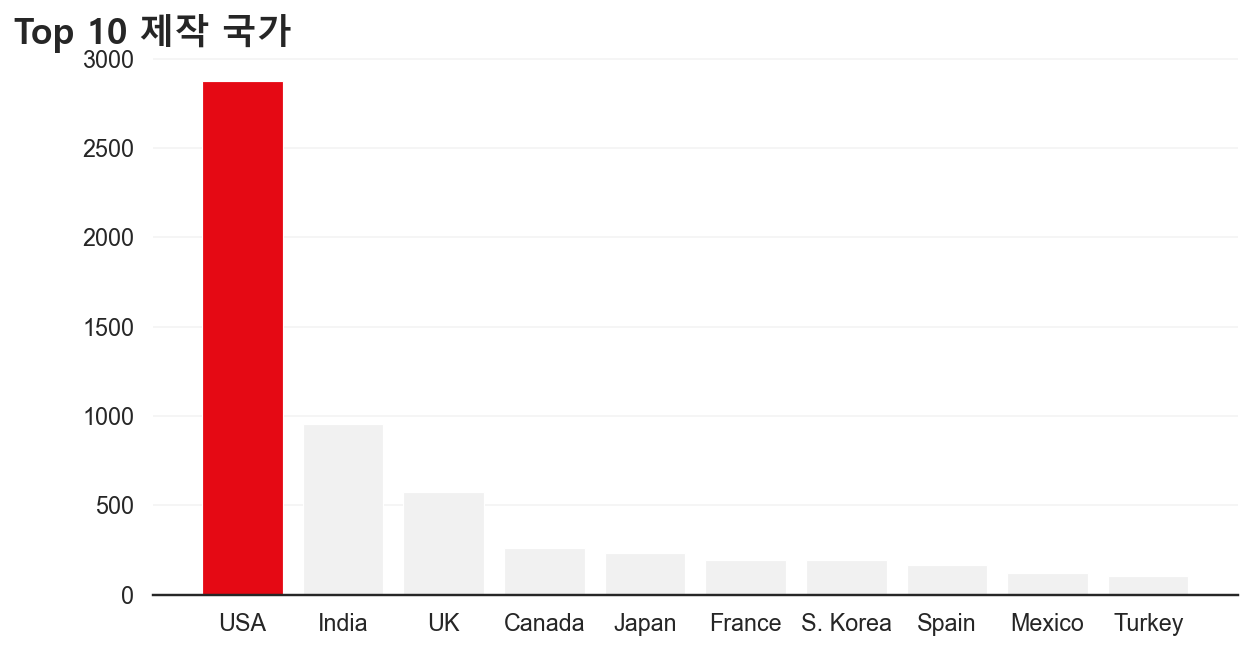

In [324]:
# bar() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
plt.bar(top10_country.index, top10_country, width=0.8, linewidth=0.6, color=colors)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Top 10 제작 국가', fontsize=18, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
sns.despine(top=True, right=True, left=True, bottom=False)
plt.show()


In [325]:
top10_country_df = df.groupby('country_1st')['country'].agg('count').sort_values(ascending=False)[:10].reset_index()
top10_country_df.head(10)

,country_1st,country
0,USA,2874
1,India,956
2,UK,576
3,Canada,259
4,Japan,235
5,France,196
6,S. Korea,194
7,Spain,168
8,Mexico,123
9,Turkey,106


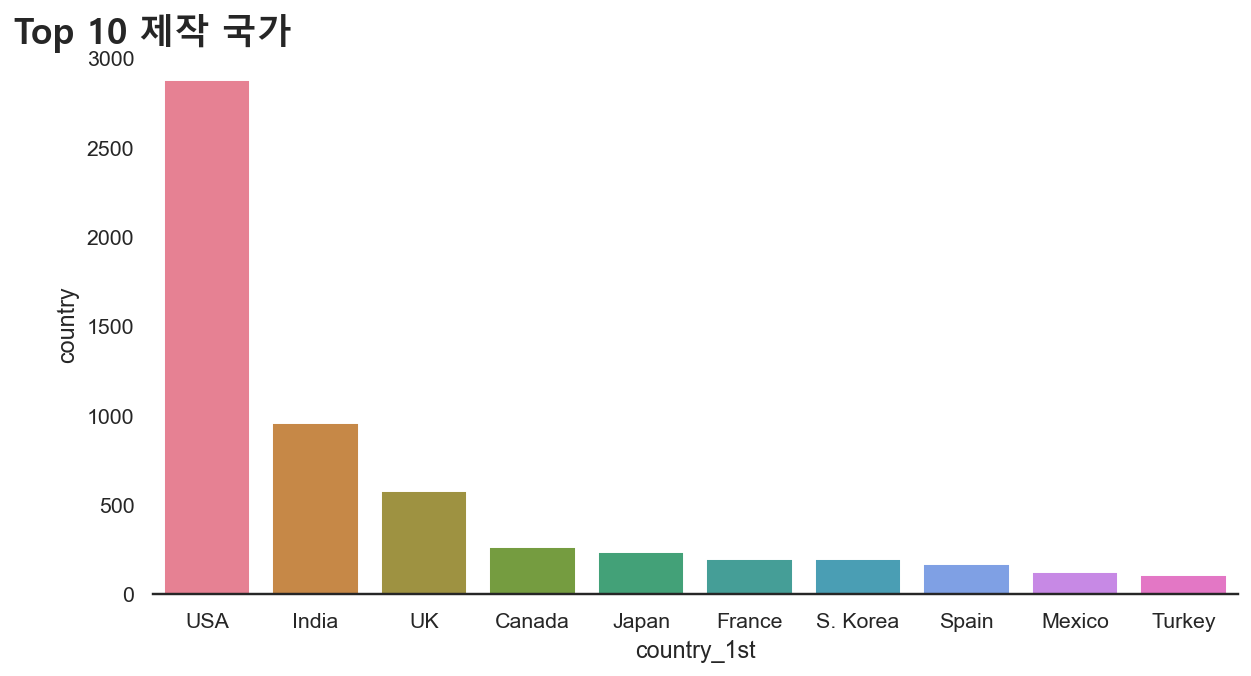

In [326]:
# barplot() 함수을 이용하여 시각화

plt.figure(figsize=(10, 5))
sns.barplot(x='country_1st', y='country', data=top10_country_df, palette='husl')
sns.despine(left=True)
plt.title('Top 10 제작 국가', fontsize=18, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()


### 8.4.6 워드 클라우드: 빈도가 높은 장르 시각화하기(403p)

In [141]:
# 워드 클라우드 설치
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [142]:
# 워드 클라우드 라이브러리 임포트
from wordcloud import WordCloud, STOPWORDS

In [327]:
text = ' '.join(df_movie['listed_in'])
text

'Dramas, International Movies Horror Movies, International Movies Action & Adventure, Independent Movies, Sci-Fi & Fantasy Dramas Horror Movies, International Movies Dramas Horror Movies, International Movies Horror Movies, International Movies, Thrillers Dramas, Thrillers Documentaries, International Movies, Sports Movies Independent Movies, Sci-Fi & Fantasy, Thrillers Dramas, International Movies, Thrillers Dramas, Thrillers Comedies, Dramas, Independent Movies Sports Movies Dramas, Independent Movies, International Movies Action & Adventure, Dramas, International Movies Dramas, International Movies Dramas, International Movies Documentaries Horror Movies, International Movies, Thrillers Documentaries, International Movies Documentaries, International Movies Dramas, International Movies, Romantic Movies Dramas, International Movies, Romantic Movies Comedies Comedies, Romantic Movies Documentaries, Sports Movies Comedies, Dramas, International Movies Comedies, Dramas, International Mo

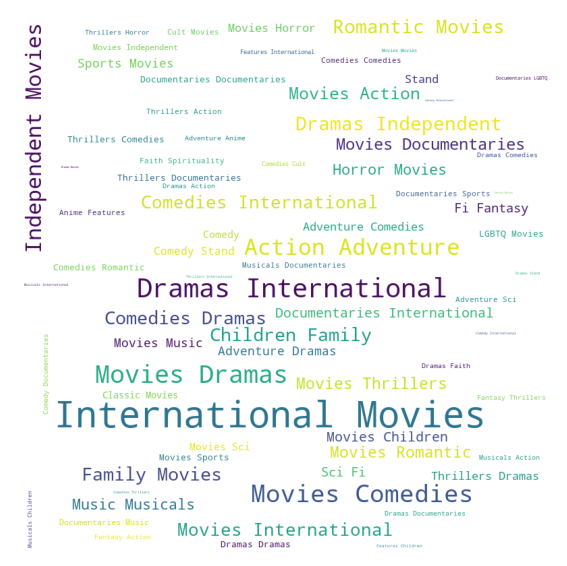

In [328]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=80, 
                      margin=10, random_state=1).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
